## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 1


*****
Assignment 1 is worth 15% of the final grade. Submit the ipynb file and the generated pdf output file. Failing to submit both files will be subject to a mark deduction.
*****



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1.

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [12]:
Forest = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
print("The first five records are")
print(Forest.head(5))

The first five records are
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [3]:
dataframe = pd.DataFrame(Forest)
print("There are" , dataframe.shape[0],"observations")
area = dataframe.loc[dataframe["area"] > 0, ["area", "rain"]]
print("There are" , area.shape[0],"observations with both a significant fire and rain")

There are 517 observations
There are 270 observations with both a significant fire and rain


# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)


In [4]:
SigFire= Forest.loc[Forest["area"] > 0, ["month", "day" ,"area"]]
print(SigFire)

    month  day   area
138   jul  tue   0.36
139   sep  tue   0.43
140   sep  mon   0.47
141   aug  wed   0.55
142   aug  fri   0.61
..    ...  ...    ...
509   aug  fri   2.17
510   aug  fri   0.43
512   aug  sun   6.44
513   aug  sun  54.29
514   aug  sun  11.16

[270 rows x 3 columns]


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [5]:
ForestFire = Forest.sort_values(by="area", ascending = False)
print("The five largest fires are")
print(ForestFire["area"].head(5))

The five largest fires are
238    1090.84
415     746.28
479     278.53
237     212.88
236     200.94
Name: area, dtype: float64


# Q5.
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [13]:
Records = ForestFire.loc[Forest["area"] > 0,["month", "temp" ,"RH","wind", "rain", "area"]]
print(Records)  

    month  temp  RH  wind  rain     area
238   sep  25.1  27   4.0   0.0  1090.84
415   aug  27.5  27   4.9   0.0   746.28
479   jul  22.6  57   4.9   0.0   278.53
237   sep  18.8  40   2.2   0.0   212.88
236   sep  18.2  46   1.8   0.0   200.94
..    ...   ...  ..   ...   ...      ...
439   sep  19.1  46   2.2   0.0     0.33
251   aug  24.0  36   3.1   0.0     0.24
252   aug  22.1  37   3.6   0.0     0.21
266   aug  19.4  55   4.0   0.0     0.17
246   aug  25.7  39   5.4   0.0     0.09

[270 rows x 6 columns]


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [7]:
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
Forest["month"] = pd.Categorical(Forest["month"] , months ,ordered=True)
print(Forest.sort_values(["month"]))

     X  Y month  day  FFMC   DMC     DC  ISI  temp   RH  wind  rain   area
104  2  4   jan  sat  82.1   3.7    9.3  2.9   5.3   78   3.1   0.0   0.00
379  4  5   jan  sun  18.7   1.1  171.4  0.0   5.2  100   0.9   0.0   0.00
96   3  4   feb  sat  83.9   8.0   30.2  2.6  12.7   48   1.8   0.0   0.00
59   2  2   feb  fri  86.6  13.2   43.0  5.3  12.3   51   0.9   0.0   0.00
202  7  4   feb  sun  83.9   8.7   32.1  2.1   8.8   68   2.2   0.0  13.05
..  .. ..   ...  ...   ...   ...    ...  ...   ...  ...   ...   ...    ...
274  8  6   dec  wed  84.0  27.8  354.6  5.3   5.1   61   8.0   0.0  11.19
281  6  5   dec  tue  85.4  25.4  349.7  2.6   5.1   24   8.5   0.0  24.77
273  4  6   dec  sun  84.4  27.2  353.5  6.8   4.8   57   8.5   0.0   8.98
279  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0   9.77
278  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0  22.03

[517 rows x 13 columns]


# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [8]:
TFire = ForestFire.loc[Forest["area"] > 0]
FFire = ForestFire.loc[Forest["area"] == 0]
TFire = TFire.assign(Fire = True)
FFire = FFire.assign(Fire = False)
FireData = pd.concat([TFire,FFire])
print(FireData)


     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area  \
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84   
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28   
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53   
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88   
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46   1.8   0.0   200.94   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...      ...   
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3  38   4.0   0.0     0.00   
10   7  5   sep  sat  92.5   88.0  698.6   7.1  17.8  51   7.2   0.0     0.00   
258  3  4   aug  sat  91.8  170.9  692.3  13.7  20.6  59   0.9   0.0     0.00   
500  8  6   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8     0.00   
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0     0.00   

      Fire  
238   True  
4

# Q8.
What is the mean area/wind/temp/RH per month? (10 points)

In [9]:
print("The mean area per report is",Forest.loc[:,"area"].mean())
print("The mean wind per report is",Forest.loc[:,"wind"].mean())
print("The mean temperature per report is",Forest.loc[:,"temp"].mean())
print("The mean RH per report is",Forest.loc[:,"RH"].mean())
for month in months:
    month_df = Forest.loc[Forest["month"] == month]   
    month_area = int(month_df["area"].mean())
    month_wind = int(month_df["wind"].mean())
    month_temp = int(month_df["temp"].mean())
    month_RH = int(month_df["RH"].mean())
    print("Averages in " + str(month) + ": Area = " + str(month_area) + " Wind = " + str(month_wind) + " Temp = " + str(month_temp) + " RH = " + str(month_RH))


The mean area per report is 12.847292069632493
The mean wind per report is 4.017601547388782
The mean temperature per report is 18.88916827852998
The mean RH per report is 44.28820116054158
Averages in jan: Area = 0 Wind = 2 Temp = 5 RH = 89
Averages in feb: Area = 6 Wind = 3 Temp = 9 RH = 55
Averages in mar: Area = 4 Wind = 4 Temp = 13 RH = 40
Averages in apr: Area = 8 Wind = 4 Temp = 12 RH = 46
Averages in may: Area = 19 Wind = 4 Temp = 14 RH = 67
Averages in jun: Area = 5 Wind = 4 Temp = 20 RH = 45
Averages in jul: Area = 14 Wind = 3 Temp = 22 RH = 45
Averages in aug: Area = 12 Wind = 4 Temp = 21 RH = 45
Averages in sep: Area = 17 Wind = 3 Temp = 19 RH = 42
Averages in oct: Area = 6 Wind = 3 Temp = 17 RH = 37
Averages in nov: Area = 0 Wind = 4 Temp = 11 RH = 31
Averages in dec: Area = 13 Wind = 7 Temp = 4 RH = 38


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

Observations each month:
month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64


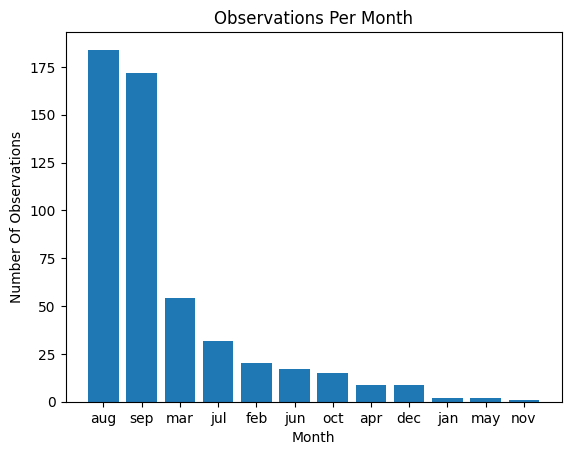

In [10]:
observations_df = Forest["month"].value_counts(normalize=False)
print("Observations each month:")
print(observations_df)
monthsDescend = Forest["month"].value_counts().index
observations_df.sort_values
fig, ax = plt.subplots()
ax.set_ylabel('Number Of Observations')
ax.set_xlabel('Month')
ax.set_title('Observations Per Month')
x = plt.bar(monthsDescend,observations_df)


# Q10.
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
138  9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0   0.36
139  1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0   0.43
140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0   0.47
141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0   0.55
142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0   0.61
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17
510  6  5   aug  fri  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0   0.43
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16

[270 rows x 13 columns]


<BarContainer object of 12 artists>

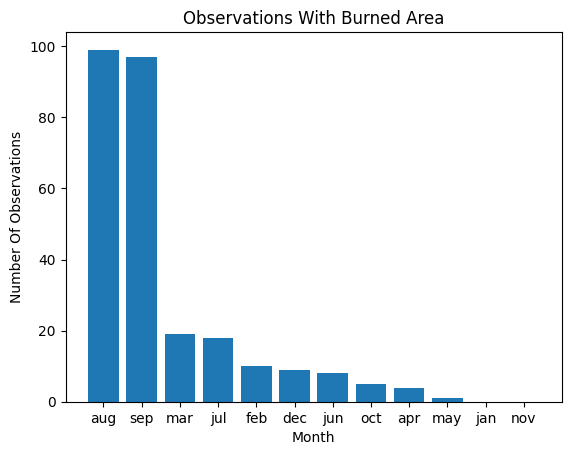

In [11]:
newForest = Forest.loc[Forest["area"] > 0]
print(newForest)
x = newForest["month"].value_counts(normalize=False)
newmonthsDescend = newForest["month"].value_counts().index
x.sort_values
fig, ax = plt.subplots()
ax.set_ylabel('Number Of Observations')
ax.set_xlabel('Month')
ax.set_title('Observations With Burned Area')
plt.bar(newmonthsDescend,x)

This is the end of Assignment 1

Ceni Babaoglu, PhD